In [1]:
import pandas as pd
import numpy as np

In [2]:
masks = pd.read_csv("mask-use-by-county.csv")
masks

,COUNTYFP,NEVER,RARELY,SOMETIMES,FREQUENTLY,ALWAYS
0,1001,0.053,0.074,0.134,0.295,0.444
1,1003,0.083,0.059,0.098,0.323,0.436
2,1005,0.067,0.121,0.120,0.201,0.491
3,1007,0.020,0.034,0.096,0.278,0.572
4,1009,0.053,0.114,0.180,0.194,0.459
...,...,...,...,...,...,...
3137,56037,0.061,0.295,0.230,0.146,0.268
3138,56039,0.095,0.157,0.160,0.247,0.340
3139,56041,0.098,0.278,0.154,0.207,0.264
3140,56043,0.204,0.155,0.069,0.285,0.287


In [3]:
counties = pd.read_csv("us-counties.csv")
counties

,date,county,state,fips,cases,deaths
0,2020-01-21,Snohomish,Washington,53061.0,1.0,0.0
1,2020-01-22,Snohomish,Washington,53061.0,1.0,0.0
2,2020-01-23,Snohomish,Washington,53061.0,1.0,0.0
3,2020-01-24,Cook,Illinois,17031.0,1.0,0.0
4,2020-01-24,Snohomish,Washington,53061.0,1.0,0.0
...,...,...,...,...,...,...
212735,2020-06-06,Pierce,Georgia,13229.0,116.0,4.0
212736,2020-06-06,Pike,Georgia,13231.0,60.0,3.0
212737,2020-06-06,Polk,Georgia,13233.0,139.0,1.0
212738,2020-06-06,Pulaski,Georgia,13235.0,43.0,2.0


In [4]:
codes = pd.read_csv("US_FIPS_Codes.csv")
codes

,U.S. FIPS County Codes,Unnamed: 1,Unnamed: 2,Unnamed: 3
0,State,County Name,FIPS State,FIPS County
1,Alabama,Autauga,01,001
2,Alabama,Baldwin,01,003
3,Alabama,Barbour,01,005
4,Alabama,Bibb,01,007
...,...,...,...,...
3138,Wyoming,Sweetwater,56,037
3139,Wyoming,Teton,56,039
3140,Wyoming,Uinta,56,041
3141,Wyoming,Washakie,56,043


In [5]:
codes.columns = ["State", "County", "StateNum", "CountyNum"]
codes = codes.drop(0)
codes['Num'] = codes['StateNum'] + codes['CountyNum']
codes.head()

,State,County,StateNum,CountyNum,Num
1,Alabama,Autauga,01,001,01001
2,Alabama,Baldwin,01,003,01003
3,Alabama,Barbour,01,005,01005
4,Alabama,Bibb,01,007,01007
5,Alabama,Blount,01,009,01009


In [6]:
for code in codes['Num']:
    code = int(code)

In [7]:
codes['Num'] = codes['Num'].astype(int)

In [8]:
codes.head()

,State,County,StateNum,CountyNum,Num
1,Alabama,Autauga,01,001,1001
2,Alabama,Baldwin,01,003,1003
3,Alabama,Barbour,01,005,1005
4,Alabama,Bibb,01,007,1007
5,Alabama,Blount,01,009,1009


In [9]:
codes_1 = codes[['State', 'County', 'Num']]

In [10]:
masks['COUNTYFP'] = masks['COUNTYFP'].astype(int)

In [11]:
df = masks.merge(codes_1, left_on='COUNTYFP', right_on='Num')
df = df.drop(columns=['Num'])

In [12]:
by_county = pd.read_csv("cases_by_county.csv")
by_county.head()

,countyFIPS,County Name,State,stateFIPS,1/22/2020,1/23/2020,1/24/2020,1/25/2020,1/26/2020,1/27/2020,...,12/14/2020,12/15/2020,12/16/2020,12/17/2020,12/18/2020,12/19/2020,12/20/2020,12/21/2020,12/22/2020,12/23/2020
0,0,Statewide Unallocated,AL,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1001,Autauga County,AL,1,0,0,0,0,0,0,...,3329,3426,3510,3570,3647,3698,3741,3780,3841,3889
2,1003,Baldwin County,AL,1,0,0,0,0,0,0,...,10898,11061,11212,11364,11556,11722,11827,11952,12155,12321
3,1005,Barbour County,AL,1,0,0,0,0,0,0,...,1275,1292,1296,1309,1318,1330,1336,1336,1363,1383
4,1007,Bibb County,AL,1,0,0,0,0,0,0,...,1455,1504,1520,1548,1577,1601,1613,1628,1660,1683


In [13]:
fips = by_county['countyFIPS']
just_cases_and_dates = by_county.drop(columns=['countyFIPS', 'County Name', 'State', 'stateFIPS']).T
just_cases_and_dates.columns = fips

In [14]:
jcad_pc = just_cases_and_dates.pct_change().fillna(0)
jcad_pc

countyFIPS,0,1001,1003,1005,1007,1009,1011,1013,1015,1017,...,56027,56029,56031,56033,56035,56037,56039,56041,56043,56045
1/22/2020,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1/23/2020,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1/24/2020,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1/25/2020,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1/26/2020,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12/19/2020,0.0,0.013984,0.014365,0.009105,0.015219,0.017727,0.006693,0.006503,0.015959,0.012440,...,0.0,0.005108,0.002463,0.001674,0.001779,0.002226,0.001005,0.005004,0.007246,0.000000
12/20/2020,0.0,0.011628,0.008958,0.004511,0.007495,0.006442,0.001330,0.004307,0.006283,0.004253,...,0.0,0.007340,0.007371,0.002924,0.003552,0.005922,0.005020,0.007112,0.005755,0.006772
12/21/2020,0.0,0.010425,0.010569,0.000000,0.009299,0.003793,0.001328,0.004289,0.004163,0.003765,...,0.0,0.015695,0.004878,0.007913,0.003540,0.016188,0.008492,0.021186,0.020029,0.002242
12/22/2020,0.0,0.016138,0.016985,0.020210,0.019656,0.018658,0.007958,0.004982,0.019807,0.013127,...,0.0,0.016556,0.007282,0.002479,0.014109,0.006517,0.006934,0.009682,0.009818,0.017897


Now we have percent changes of COVID cases per county. Now let's look at top five to ten counties who elected to not wear masks on the survey

In [15]:
df.head()

,COUNTYFP,NEVER,RARELY,SOMETIMES,FREQUENTLY,ALWAYS,State,County
0,1001,0.053,0.074,0.134,0.295,0.444,Alabama,Autauga
1,1003,0.083,0.059,0.098,0.323,0.436,Alabama,Baldwin
2,1005,0.067,0.121,0.120,0.201,0.491,Alabama,Barbour
3,1007,0.020,0.034,0.096,0.278,0.572,Alabama,Bibb
4,1009,0.053,0.114,0.180,0.194,0.459,Alabama,Blount


We're going to make a score based on how often a county wears masks. For now, it is going to be NEVER*2 + RARELY

In [16]:
df['mask_score'] = df['NEVER']*2 + df['RARELY']
top20 = df.sort_values(by='mask_score', ascending=False).head(20)
t20_fps = top20['COUNTYFP'].tolist()
t20_fps

[29229,
 49027,
 29215,
 38005,
 38095,
 19091,
 19029,
 29105,
 29091,
 38071,
 29067,
 31013,
 55103,
 38027,
 49023,
 29225,
 30027,
 27063,
 29203,
 38103]

In [17]:
jcad_pc[[i for i in t20_fps]]

countyFIPS,29229,49027,29215,38005,38095,19091,19029,29105,29091,38071,29067,31013,55103,38027,49023,29225,30027,27063,29203,38103
1/22/2020,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1/23/2020,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1/24/2020,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1/25/2020,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1/26/2020,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12/19/2020,0.003158,0.027855,0.003213,0.001070,0.019920,0.002240,0.002062,0.004745,0.009416,0.003602,0.003604,0.000000,0.016393,0.002571,0.007962,0.009928,0.003663,0.005517,0.007653,0.000000
12/20/2020,0.015740,0.000000,0.003203,0.009615,0.007812,0.011173,0.010288,0.012881,0.008396,0.005743,0.023339,0.004043,0.002846,0.002564,0.000000,0.006256,0.006083,0.015089,0.010127,0.000000
12/21/2020,0.004132,0.000000,0.003192,0.000000,0.000000,0.004420,0.002037,0.006359,0.004625,0.000000,0.010526,0.006711,0.000000,0.000000,0.000000,0.008881,0.002418,0.008108,0.000000,0.000000
12/22/2020,0.000000,0.000000,0.000000,0.010582,0.003876,0.007701,0.000000,0.000000,0.000000,0.004996,0.000000,0.004000,0.004730,0.000000,0.000000,0.000000,0.002413,0.008043,0.000000,0.007673


Now, it seems that we have a lot of stuff, and sort of disorganized. Let's try to figure out two questions:
1) What are the effect of wearing masks on total cases per e.g. 1M population in a country?

2) What is the average percent change in covid cases, only considering counties where COVID became present in that country? Essentially, we eliminate all of the zeros since COVID was not yet intoduced in that country.

In [18]:
#Solve Q1

pop = pd.read_csv("county_pop.csv")
pop.head()

,countyFIPS,County Name,State,population
0,0,Statewide Unallocated,AL,0
1,1001,Autauga County,AL,55869
2,1003,Baldwin County,AL,223234
3,1005,Barbour County,AL,24686
4,1007,Bibb County,AL,22394


In [19]:
#Remove first row
pop = pop.drop(0)

In [20]:
#Look at our merged data frame with mask wearing
df.head()

,COUNTYFP,NEVER,RARELY,SOMETIMES,FREQUENTLY,ALWAYS,State,County,mask_score
0,1001,0.053,0.074,0.134,0.295,0.444,Alabama,Autauga,0.180
1,1003,0.083,0.059,0.098,0.323,0.436,Alabama,Baldwin,0.225
2,1005,0.067,0.121,0.120,0.201,0.491,Alabama,Barbour,0.255
3,1007,0.020,0.034,0.096,0.278,0.572,Alabama,Bibb,0.074
4,1009,0.053,0.114,0.180,0.194,0.459,Alabama,Blount,0.220


In [21]:
#Get most recent stat for cases
county_cases = by_county[['countyFIPS', '12/17/2020']]
county_cases.columns = ['COUNTYFP', "Cases"]
county_cases.head()

,COUNTYFP,Cases
0,0,0
1,1001,3570
2,1003,11364
3,1005,1309
4,1007,1548


In [22]:
#Merge data frames
temp = df.merge(county_cases, on='COUNTYFP')

In [23]:
#Now we merge pop data frame
pop = pop.rename(columns={"countyFIPS" : "COUNTYFP"})[['COUNTYFP', 'population']]
df_2 = temp.merge(pop, on='COUNTYFP')

In [24]:
df_2['Place'] = df_2['County'] + " County,  " + df_2['State']
df_2['Cases_per_1M'] = (df_2['Cases'] / df_2['population']) * 1000000

In [25]:
sorted_by_masks = df_2.sort_values('mask_score', ascending=False)
top_25_masks = sorted_by_masks.head(25)['Place']
top_25_masks

1588         Wright County,  Missouri
2781            Millard County,  Utah
1581          Texas County,  Missouri
1984     Benson County,  North Dakota
2029     Towner County,  North Dakota
826            Humboldt County,  Iowa
795                Cass County,  Iowa
1527        Laclede County,  Missouri
1520         Howell County,  Missouri
2017     Ramsey County,  North Dakota
1508        Douglas County,  Missouri
1652      Box Butte County,  Nebraska
3090      Richland County,  Wisconsin
1995       Eddy County,  North Dakota
2779               Juab County,  Utah
1586        Webster County,  Missouri
1603          Fergus County,  Montana
1337       Jackson County,  Minnesota
1575        Shannon County,  Missouri
2033      Wells County,  North Dakota
1503           Dade County,  Missouri
2407    Roberts County,  South Dakota
1592          Blaine County,  Montana
2371        Day County,  South Dakota
2021    Rolette County,  North Dakota
Name: Place, dtype: object

In [26]:
sorted_by_cases_per = df_2.sort_values('Cases_per_1M', ascending=False)
top_25_cases = sorted_by_cases_per.head(25)['Place']
top_25_cases

250           Crowley County,  Colorado
948              Norton County,  Kansas
2357    Bon Homme County,  South Dakota
144           Lincoln County,  Arkansas
2361      Buffalo County,  South Dakota
2373        Dewey County,  South Dakota
405      Chattahoochee County,  Georgia
2466            Lake County,  Tennessee
2503       Trousdale County,  Tennessee
791           Buena Vista County,  Iowa
1995         Eddy County,  North Dakota
1667           Dakota County,  Nebraska
345          Lafayette County,  Florida
1997       Foster County,  North Dakota
1358          Nobles County,  Minnesota
906           Ellsworth County,  Kansas
967              Seward County,  Kansas
143               Lee County,  Arkansas
138           Jackson County,  Arkansas
1591          Big Horn County,  Montana
2551           Childress County,  Texas
3077       Menominee County,  Wisconsin
908                Ford County,  Kansas
2031        Walsh County,  North Dakota
907              Finney County,  Kansas


In [27]:
sorted_by_cases_per

,COUNTYFP,NEVER,RARELY,SOMETIMES,FREQUENTLY,ALWAYS,State,County,mask_score,Cases,population,Place,Cases_per_1M
250,8025,0.002,0.034,0.080,0.294,0.590,Colorado,Crowley,0.038,1498,6061,"Crowley County, Colorado",247153.934994
948,20137,0.161,0.163,0.177,0.225,0.275,Kansas,Norton,0.485,1193,5361,"Norton County, Kansas",222533.109494
2357,46009,0.108,0.205,0.198,0.193,0.295,South Dakota,Bon Homme,0.421,1436,6901,"Bon Homme County, South Dakota",208085.784669
144,5079,0.035,0.016,0.194,0.201,0.554,Arkansas,Lincoln,0.086,2704,13024,"Lincoln County, Arkansas",207616.707617
2361,46017,0.161,0.059,0.157,0.253,0.371,South Dakota,Buffalo,0.381,404,1962,"Buffalo County, South Dakota",205912.334353
...,...,...,...,...,...,...,...,...,...,...,...,...,...
180,6003,0.025,0.085,0.088,0.190,0.612,California,Alpine,0.135,5,1129,"Alpine County, California",4428.697963
2971,53055,0.015,0.004,0.021,0.229,0.730,Washington,San Juan,0.034,70,17582,"San Juan County, Washington",3981.344557
541,15007,0.000,0.021,0.046,0.108,0.825,Hawaii,Kauai,0.021,125,72293,"Kauai County, Hawaii",1729.074738
88,2282,0.047,0.012,0.078,0.381,0.481,Alaska,Yakutat,0.106,0,579,"Yakutat County, Alaska",0.000000


In [28]:
low_25_masks = sorted_by_masks.tail(25)['Place']
low_25_cases = sorted_by_cases_per.tail(25)['Place']
low_25_masks

1869          Seneca County,  New York
2981       Whitman County,  Washington
2662           Live Oak County,  Texas
304     Middlesex County,  Connecticut
1815       Socorro County,  New Mexico
2520           Atascosa County,  Texas
633          Kendall County,  Illinois
311           Sussex County,  Delaware
195           Lake County,  California
1207       Worcester County,  Maryland
2846      Gloucester County,  Virginia
2702           Presidio County,  Texas
191       Imperial County,  California
201      Mendocino County,  California
2618               Hays County,  Texas
1881           Yates County,  New York
2869       Middlesex County,  Virginia
2526                Bee County,  Texas
2867         Mathews County,  Virginia
2602           Gonzales County,  Texas
2760             Wilson County,  Texas
2541           Caldwell County,  Texas
2948       Clallam County,  Washington
296           Summit County,  Colorado
2641             Karnes County,  Texas
Name: Place, dtype: objec

In [29]:
low_25_cases

1765    Sullivan County,  New Hampshire
2803        Grand Isle County,  Vermont
2948        Clallam County,  Washington
2648                King County,  Texas
224          Sierra County,  California
1180           Sagadahoc County,  Maine
1175                Knox County,  Maine
2799         Caledonia County,  Vermont
1176             Lincoln County,  Maine
2797           Addison County,  Vermont
2959      Jefferson County,  Washington
2664              Loving County,  Texas
2810           Windsor County,  Vermont
68       Aleutians West County,  Alaska
2807           Rutland County,  Vermont
1170           Aroostook County,  Maine
210          Plumas County,  California
1179         Piscataquis County,  Maine
75               Haines County,  Alaska
542                Maui County,  Hawaii
180          Alpine County,  California
2971       San Juan County,  Washington
541               Kauai County,  Hawaii
88              Yakutat County,  Alaska
71          Bristol Bay County,  Alaska


It's hard to really gage a relationship by trying to find matches within the top 25s of each respective category. Let's create a scatter plot and try to more visually see if there exists any sort of relationship. We do see that Eddy County, North Dakota, is in the top 25 in mask score and cases per million population, and Clallam County in Washington is one of the lowest 25 counties in mask score and cases per 1M pop.

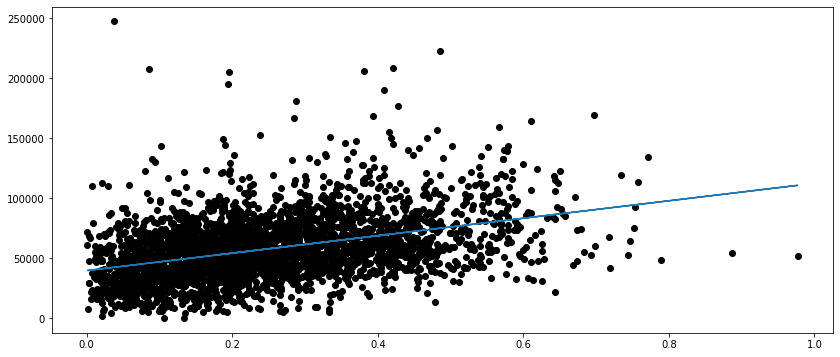

In [31]:
#Plot what we figured out

import matplotlib.pyplot as plt

x = df_2['mask_score']
y = df_2['Cases_per_1M']
m, b = np.polyfit(x, y, 1)

plt.figure(figsize=(14, 6))
plt.plot(x, y, 'o', color='black')
plt.plot(x, m*x + b)

In [33]:
from sklearn.linear_model import LinearRegression

X = pd.DataFrame(x)
model = LinearRegression().fit(X, y)



In [41]:
model.coef_[0]

72717.24746416532

In [42]:
model.intercept_

39510.415723370075

In [43]:
s = np.arange(0, 1.1, 0.1)
pred = [model.predict(np.array([[i]]))[0] for i in s]
d = {'Mask Score': s, 'Predicted Cases per 1M Pop' : pred}
pd.DataFrame(data=d)

,Mask Score,Predicted Cases per 1M Pop
0,0.0,39510.415723
1,0.1,46782.140470
2,0.2,54053.865216
3,0.3,61325.589963
4,0.4,68597.314709
5,0.5,75869.039455
6,0.6,83140.764202
7,0.7,90412.488948
8,0.8,97684.213695
9,0.9,104955.938441


Clearly, there seems to be a positive relationship, as the slope of the regression line came out to be 72,717.25 with an intercept of 39,510.42. 

If we predicted that the mask score of a country would be 1.0 (the percentage of those who NEVER wear masks * 2 + the percentage of those who say they wear masks RARELY) (E.G. 50% of the county says they never wear masks), it is predicted that the number of cases per 1M population for that country is 112,227.66. (This number is much higher than if the mask score were 0 or close to 0).

Now, let's see if these coefficients of regression are statistically significant or not. To do this, we will conduct hypothesis testing with the null hypothesis that these coefficients are zero. 

Let's start with Beta 1, or our slope value.

$H_0: \beta_1 = 0$

In [44]:
#To find the t-statistic, we need to find standard errors

In [46]:
N = len(X)
p = len(X.columns) + 1  # plus one because LinearRegression adds an intercept term

X_with_intercept = np.empty(shape=(N, p), dtype=np.float)
X_with_intercept[:, 0] = 1
X_with_intercept[:, 1:p] = X.values

beta_hat = np.linalg.inv(X_with_intercept.T @ X_with_intercept) @ X_with_intercept.T @ y.values
print(beta_hat)

[39510.41572337 72717.24746417]


In [50]:
y_hat = model.predict(X)
residuals = y - y_hat
residual_sum_of_squares = residuals.T @ residuals
sigma_squared_hat = residual_sum_of_squares / (N - p)
var_beta_hat = np.linalg.inv(X_with_intercept.T @ X_with_intercept) * sigma_squared_hat
for p_ in range(p):
    standard_error = var_beta_hat[p_, p_] ** 0.5
    print(f"SE(beta_hat[{p_}]): {standard_error}")


SE(beta_hat[0]): 835.5936826032591
SE(beta_hat[1]): 2929.0539169624976


In [51]:
# import statsmodels.api as sm
# ols = sm.OLS(y, X)
# ols_result = ols.fit()
# ols_result.summary()

$t = \dfrac{\beta_1 - 0}{SE(\beta_1)} = \dfrac{72717.25 - 0}{2929.054} = 24.826$

In [57]:
#In code
beta_hat[1] / standard_error

24.826189454230004

$24.82 = t > t^* \approx 2.5$, reject the null

Because our t-statistic is higher than the critical value for 1% significance (and 5%), we reject the null hypothesis. This means we can say there is a positive relationship between the two variables.

Now that we can say there is a definitive relationship between my created mask score variable and cases of coronavirus, now let's examine the percent changes in counties of COVID, but only when COVID is present in that county.

In [32]:
df.head()

,COUNTYFP,NEVER,RARELY,SOMETIMES,FREQUENTLY,ALWAYS,State,County,mask_score
0,1001,0.053,0.074,0.134,0.295,0.444,Alabama,Autauga,0.180
1,1003,0.083,0.059,0.098,0.323,0.436,Alabama,Baldwin,0.225
2,1005,0.067,0.121,0.120,0.201,0.491,Alabama,Barbour,0.255
3,1007,0.020,0.034,0.096,0.278,0.572,Alabama,Bibb,0.074
4,1009,0.053,0.114,0.180,0.194,0.459,Alabama,Blount,0.220


In [46]:
mask_scores_in_order = df.sort_values("mask_score", ascending=False)["COUNTYFP"].tolist()
mask_scores_in_order[0:5]

[29229, 49027, 29215, 38005, 38095]

In [44]:
jcad_pc[[i for i in mask_scores_in_order]]

countyFIPS,29229,49027,29215,38005,38095,19091,19029,29105,29091,38071,...,36123,51119,48025,51115,48177,48493,48055,53009,8117,48255
1/22/2020,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1/23/2020,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1/24/2020,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1/25/2020,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1/26/2020,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12/19/2020,0.003158,0.027855,0.003213,0.001070,0.019920,0.002240,0.002062,0.004745,0.009416,0.003602,...,0.007595,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.076531,0.009922,0.000000
12/20/2020,0.015740,0.000000,0.003203,0.009615,0.007812,0.011173,0.010288,0.012881,0.008396,0.005743,...,0.010050,0.021739,0.000000,0.019380,0.000000,0.000000,0.000000,0.000000,0.002585,0.000000
12/21/2020,0.004132,0.000000,0.003192,0.000000,0.000000,0.004420,0.002037,0.006359,0.004625,0.000000,...,0.004975,0.012766,0.120018,0.022814,0.075140,0.270325,0.070058,0.022117,0.011346,0.085355
12/22/2020,0.000000,0.000000,0.000000,0.010582,0.003876,0.007701,0.000000,0.000000,0.000000,0.004996,...,0.014851,0.033613,0.014724,0.022305,0.011104,0.006933,0.011211,0.023184,0.014788,0.005795


In [75]:
#Recursive function to calculate mean percent change only when covid is present in the county
def covid_avg(array):
    if array[0] == 0 and array[1] == 0:
        return covid_avg(array[1:])
    else:
        return np.mean(array)


In [77]:
arr = np.array([0, 0, 0, 0.2, 0.2, 0.4, 0, 0.2])
covid_avg(arr)

0.16666666666666666

In [106]:
covid_avgs = []
for col in jcad_pc.columns:
    covid_avgs += np.mean(jcad_pc[col])

inf

1001